In [11]:
# Import pustaka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D plot

# Upload CSV
from google.colab import files
uploaded = files.upload()

# Baca data
import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=';', header=0)

# Pastikan kolom benar
print("Kolom:", df.columns)


# Bersihkan nama kolom dari spasi di awal/akhir
df.columns = df.columns.str.strip()


for col in df.columns:
  print(f"\nData pada kolom '{col}':")
  print(df[col].head()) # Menampilkan beberapa baris pertama data di setiap kolom
  # Anda bisa menampilkan seluruh data jika diinginkan dengan print(df[col])
  # Namun, ini bisa memakan waktu dan memori untuk dataset besar



Saving tanpa_reflektor.csv to tanpa_reflektor (4).csv
Kolom: Index(['Waktu', 'Suhu', 'Tegangan', 'Arus'], dtype='object')

Data pada kolom 'Waktu':
0    2025/05/10 08:00:00
1    2025/05/10 08:01:00
2    2025/05/10 08:02:00
3    2025/05/10 08:03:00
4    2025/05/10 08:04:00
Name: Waktu, dtype: object

Data pada kolom 'Suhu':
0    34.88
1    35.38
2    35.88
3    36.50
4    36.63
Name: Suhu, dtype: float64

Data pada kolom 'Tegangan':
0    18.13
1    18.15
2    18.16
3    18.18
4    18.20
Name: Tegangan, dtype: float64

Data pada kolom 'Arus':
0    57.6
1    57.9
2    58.3
3    58.9
4    59.7
Name: Arus, dtype: float64


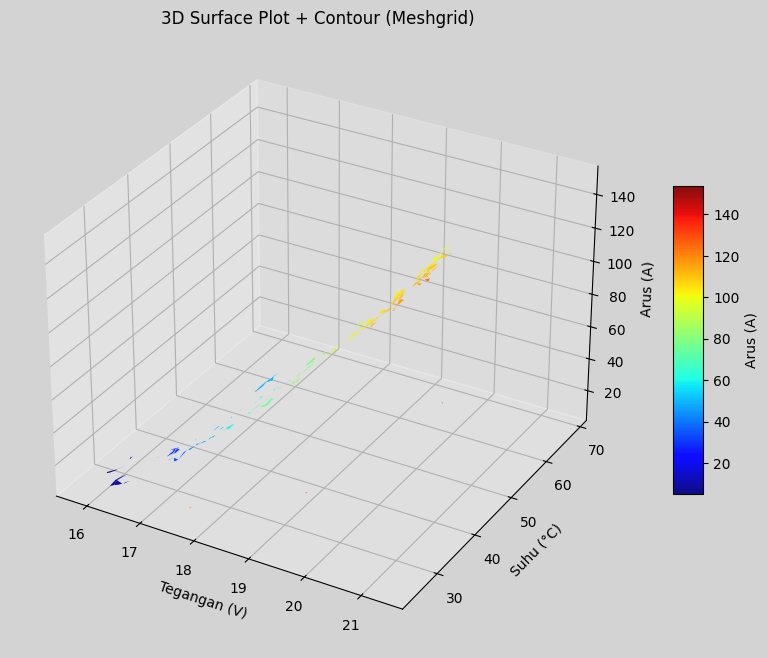

In [14]:
# Ubah ke numerik
df['Suhu'] = pd.to_numeric(df['Suhu'], errors='coerce')
df['Tegangan'] = pd.to_numeric(df['Tegangan'], errors='coerce')
df['Arus'] = pd.to_numeric(df['Arus'], errors='coerce')

# Buat pivot tabel: Suhu sebagai baris (Y), Tegangan sebagai kolom (X)
pivot = df.pivot_table(index='Suhu', columns='Tegangan', values='Arus')

# Buat meshgrid dari suhu (Y) dan tegangan (X)
X, Y = np.meshgrid(pivot.columns.values, pivot.index.values)
Z = pivot.values

# Plot: Surface dengan kontur di bawah (zdir='z'), mirip MATLAB
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none', antialiased=True, alpha=0.95)

# Kontur di bidang dasar (zdir='z')
ax.contour(X, Y, Z, zdir='z', offset=np.nanmin(Z), cmap='Reds', linestyles='solid')

# Background dan gaya
ax.set_facecolor("lightgrey")
fig.patch.set_facecolor("lightgrey")

# Label sumbu
ax.set_xlabel('Tegangan (V)')
ax.set_ylabel('Suhu (°C)')
ax.set_zlabel('Arus (A)')
ax.set_title('3D Surface Plot + Contour (Meshgrid)')

# Colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Arus (A)')

# Tampilkan
plt.show()

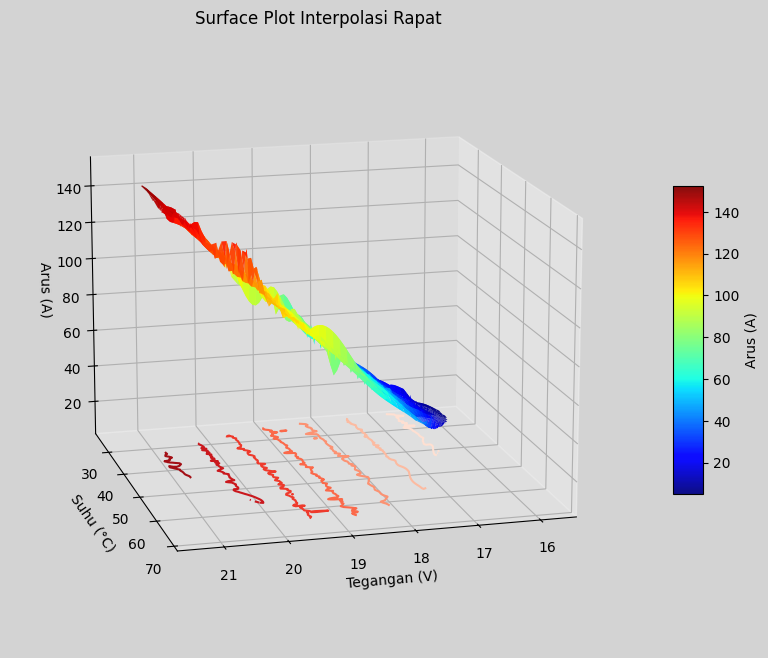

In [19]:
from scipy.interpolate import griddata

df = df.dropna(subset=['Suhu', 'Tegangan', 'Arus'])

# Ambil data asli dari frame sebagai array datar (flatten)
x = df['Tegangan'].values
y = df['Suhu'].values
z = df['Arus'].values

# Buat grid yang lebih rapat
xi = np.linspace(np.min(x), np.max(x), 100)  # Resolusi lebih tinggi di X (tegangan)
yi = np.linspace(np.min(y), np.max(y), 100)  # Resolusi lebih tinggi di Y (suhu)
X, Y = np.meshgrid(xi, yi)

# Interpolasi nilai Arus (z) pada grid baru
Z = griddata((x, y), z, (X, Y), method='cubic')  # metode: 'linear', 'cubic', atau 'nearest'

# Plot: Surface dan kontur
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none', antialiased=True, alpha=0.95)

# Kontur di dasar (Z min)
ax.contour(X, Y, Z, zdir='z', offset=np.nanmin(Z), cmap='Reds', linestyles='solid')

# Gaya visual
ax.set_facecolor("lightgrey")
fig.patch.set_facecolor("lightgrey")

# Label sumbu
ax.set_xlabel('Tegangan (V)')
ax.set_ylabel('Suhu (°C)')
ax.set_zlabel('Arus (A)')
ax.set_title('Surface Plot Interpolasi Rapat')

# Colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Arus (A)')

ax.view_init(elev=15, azim=75)

# Tampilkan
plt.show()
